# Problem Statement
___

- https://medium.com/mlearning-ai/a-thorough-dive-into-the-ames-iowa-housing-dataset-part-1-of-5-7205093a5a53
- https://github.com/jesservillines/Housing-Prices
- https://nycdatascience.com/blog/student-works/machine-learning-project/

# 0.0 Import libraries
___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'

# 0.5 Function Creation
___

In [77]:
type(df_train[1][0])

KeyError: 1

In [78]:
def visual_subplot(nrows , ncols , feature_list , df = df_train):
    plt.figure(figsize = (16,16))

    for i in range(len(feature_list)):
        plt.subplot(nrows , ncols , i+1)
        
        sns.scatterplot(data = df,
                        x = feature_list[i],
                        y = 'SalePrice')
        plt.title(f'{feature_list[i]} vs Sale Price')
        plt.tight_layout()

# 1.0 Exploring Datasets
___

- 1.1 Dataset Overview
- 1.2 Exploring Null Values
- 1.3 Exploring Duplicates
- 1.4a General Overview for Basement Features
- 1.4b General Overview for Garage Features
- 1.5 Removing outliers
- 1.6 Data cleaning on numeric columns
- 1.7a Data cleaning on non numeric columns
- 1.7b Splitting non numeric features into ordinal and non-ordinal features

In [2]:
df_sub = pd.read_csv('datasets/sample_sub_reg.csv')
df_train = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')

In [38]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
df_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


### 1.1 Dataset overview
___

In [7]:
print('Train data shape: ' , df_train.shape)
print('Train data dim: ' , df_train.ndim)
print('Train data size: ' , df_train.size)
print('Test data shape: ' , df_test.shape)
print('Test data dim: ' , df_test.ndim)
print('Test data size: ' , df_test.size)

Train data shape:  (2051, 81)
Train data dim:  2
Train data size:  166131
Test data shape:  (878, 80)
Test data dim:  2
Test data size:  70240


### 1.2 Exploring Null Value
___

Text(0, 0.5, 'Features')

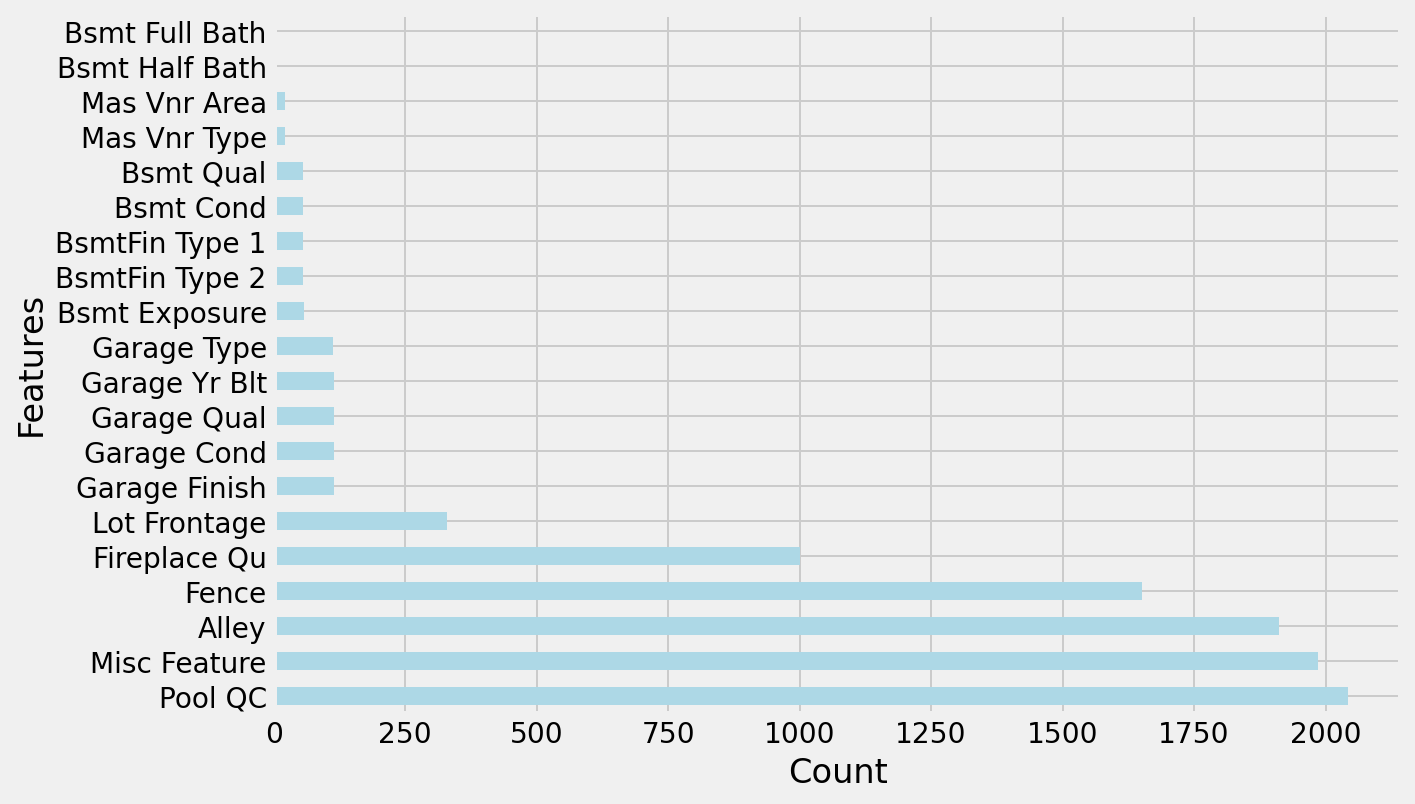

In [8]:
# Visualing Null Value Count for Features
x = df_train.isnull().sum().sort_values(ascending = False).head(20)

plt.figure(figsize = (9,6))
x.plot(kind = 'barh' , color = 'lightblue')

plt.xlabel('Count')
plt.ylabel('Features')

### 1.3 Exploring Duplicates
___

In [9]:
df_train.duplicated().sum()

0

### 1.4  General Overview of Numeric and Non-numeric features

In [10]:
# Finding Numeric Features
numeric_list = []
for col_name , data in df_train.items():
    if pd.api.types.is_numeric_dtype(data):
        numeric_list.append(col_name)
        
print(numeric_list)

['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']


In [11]:
# Finding Categorical Features
cat_list = []
for col_name , data in df_train.items():
    if not pd.api.types.is_numeric_dtype(data):
        cat_list.append(col_name)
        
print(cat_list)

['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type']


### 1.4a General Overview on Date Features
___

- Base on Date features , the year sold between 2006 to 2010 seem fairly consistent for the sales price. Except the outlier , there are no special surge in sales price for house sold in later years

- House built more recently generally is able to be sold at a higher price. 

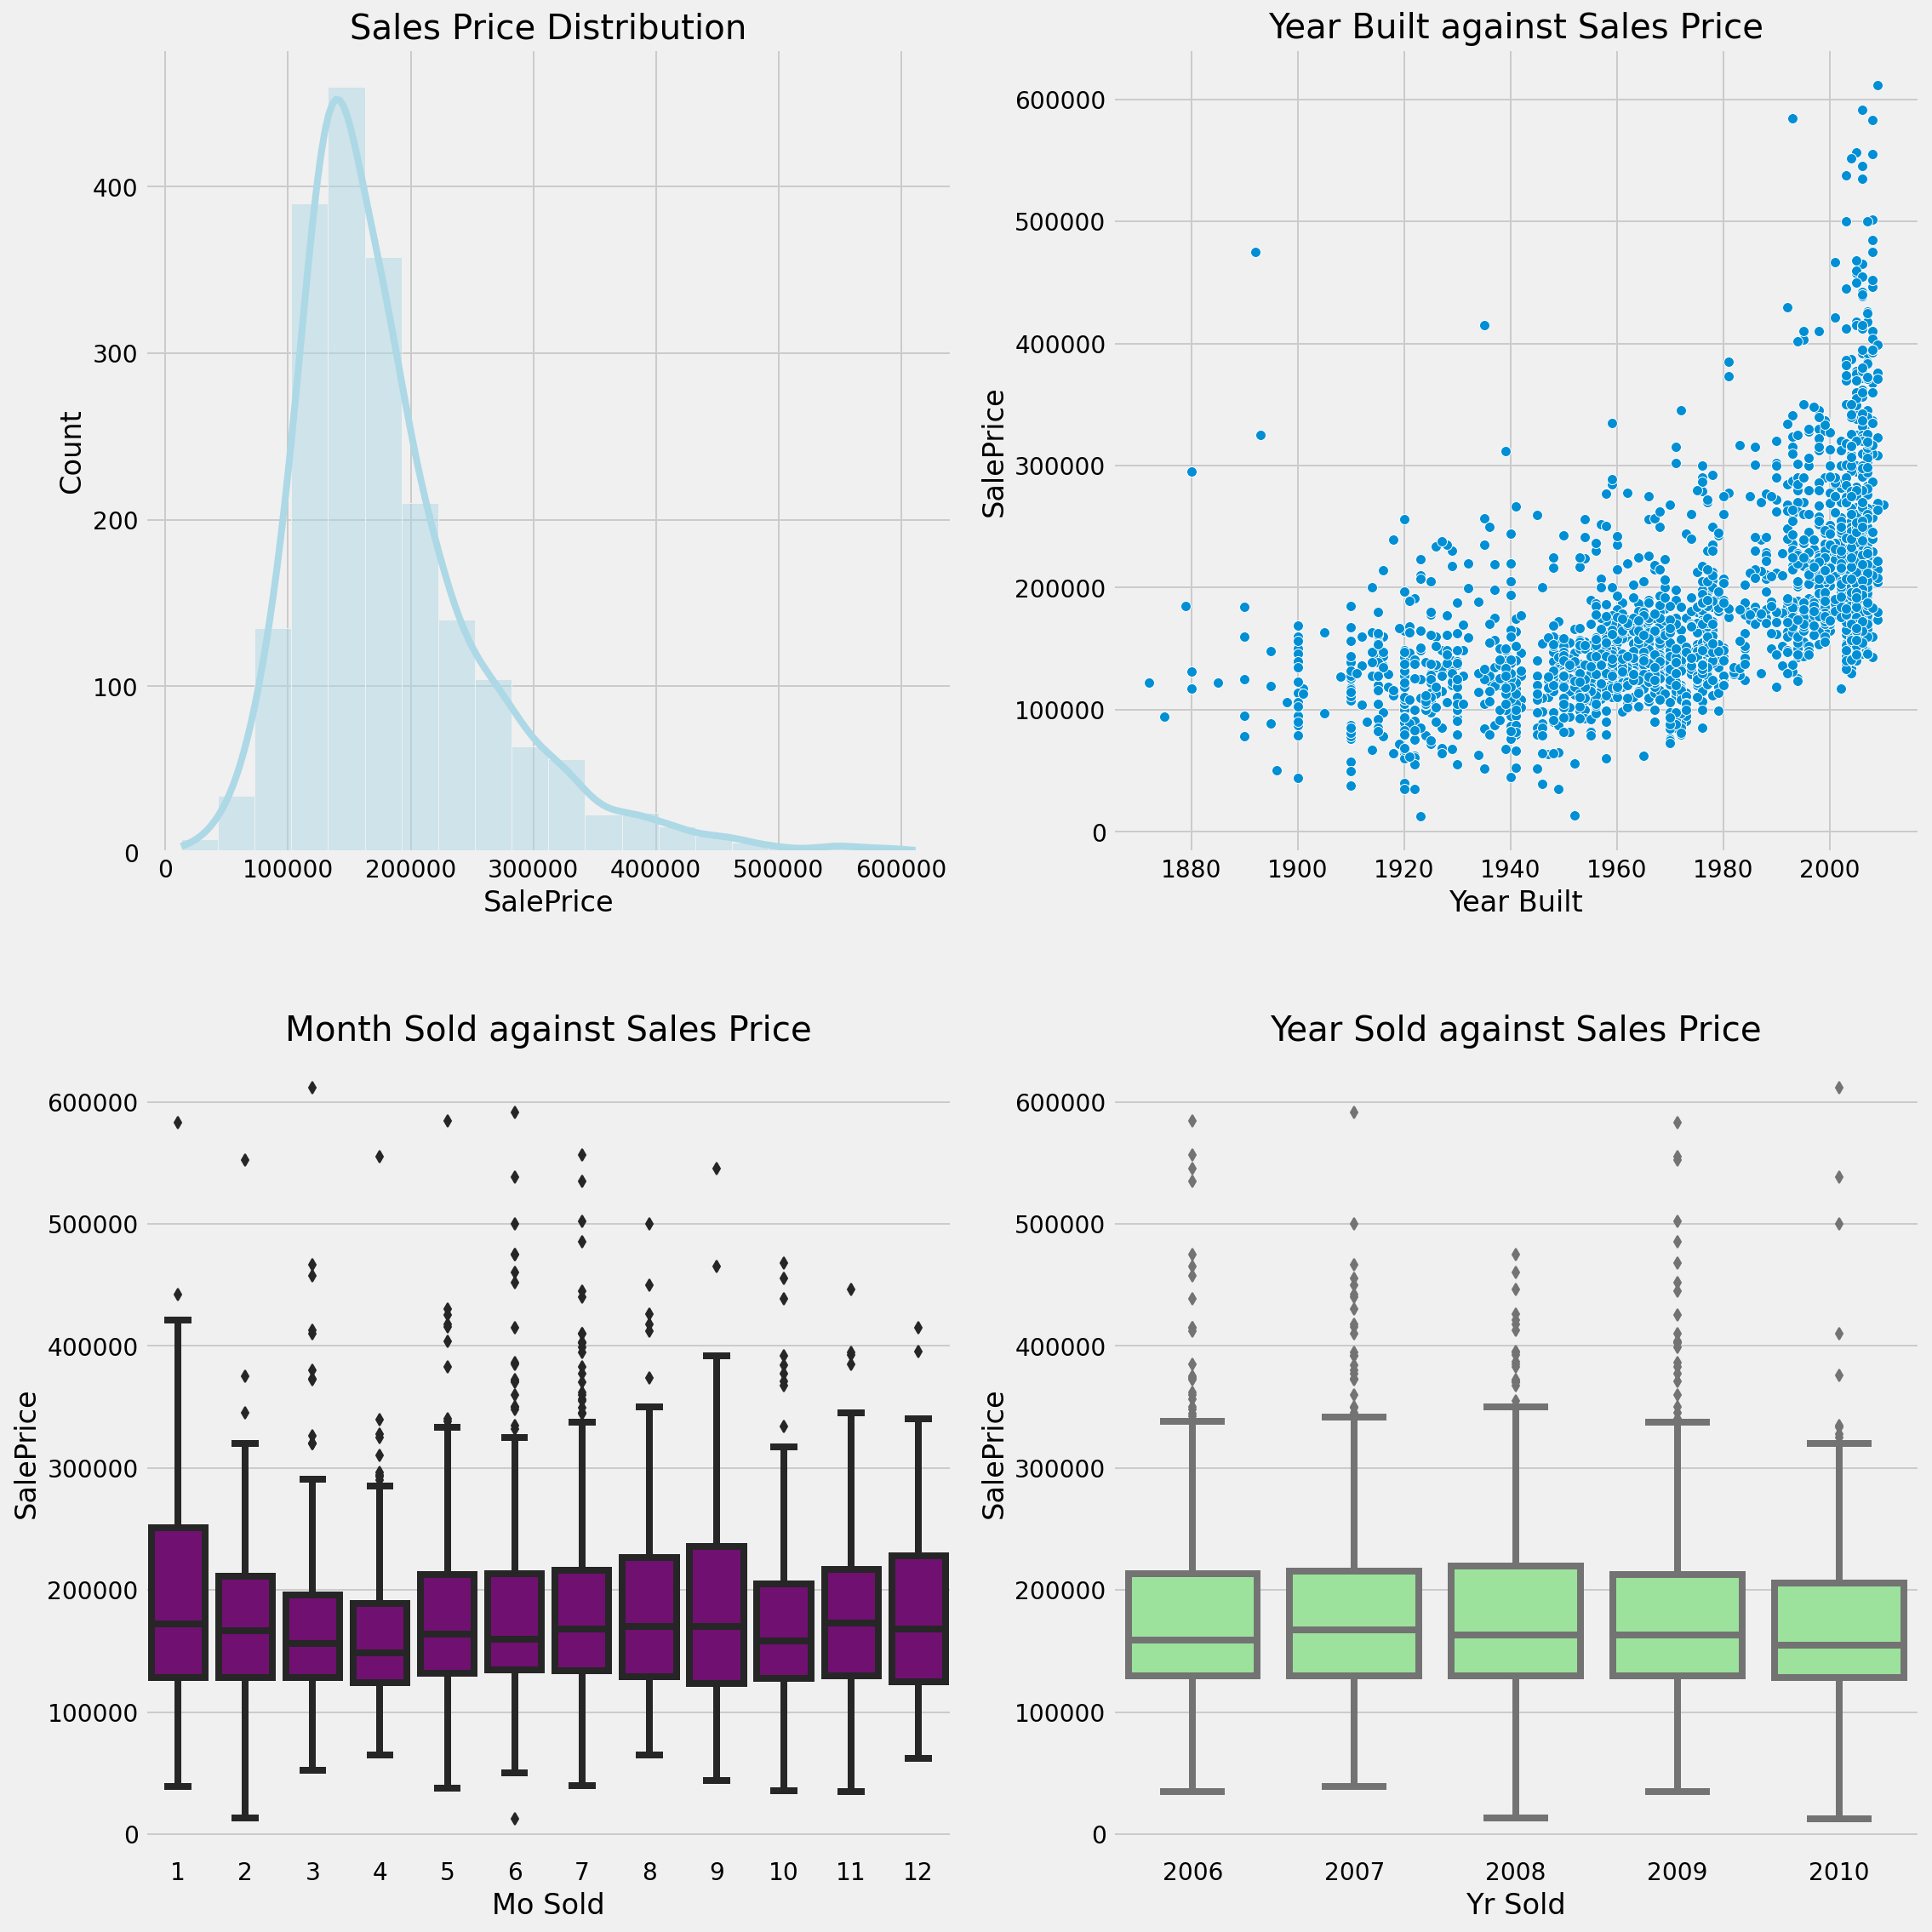

In [12]:
plt.figure(figsize = (16,16))

# Plot 1
plt.subplot(2,2,1)
sns.histplot(data = df_train,
             x = 'SalePrice',
             stat = 'count',
             color = 'lightblue',
             bins = 20,
             kde = True)
plt.title('Sales Price Distribution')

# Plot 2 : year Built against Sales Price
plt.subplot(2,2,2)
sns.scatterplot(data = df_train,
                     x = 'Year Built',
                     y = 'SalePrice')
plt.title('Year Built against Sales Price')


# Plot 3 : Month Sold against Sales Price
plt.subplot(2,2,3)
sns.boxplot(data = df_train,
            x = 'Mo Sold',
            y = 'SalePrice',
            color = 'purple');
plt.title('Month Sold against Sales Price')


# Plot 3 : Year Sold against Sales Price
plt.subplot(2,2,4)
sns.boxplot(data = df_train,
            x = 'Yr Sold',
            y = 'SalePrice',
            color = 'lightgreen')
plt.title('Year Sold against Sales Price')

plt.tight_layout(h_pad = 4)

### 1.4b General Overview on Basement Features
___

- Total 11 features for Basement : 
    - 6 numeric features : [BsmtFin SF 1, BsmtFin SF 2 , Bsmt Unf SF , Total Bsmt SF , Bsmt Full Bath , Bsmt Half Bath]
    - 4 non-numeric ordinal features : ['Bsmt Qual', 'Bsmt Cond' , 'BsmtFin Type 1' , 'BsmtFin Type 2']
    - 1 non-numeric , non-ordinal features : ['Bsmt Exposure']
- Excellent and Good Bsmt quality typically fetch a higher price.
- Some non relational outliers observed in Total Bsmt SF , BSMT

In [39]:
basement_list

['Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath']

<Figure size 1152x1152 with 0 Axes>

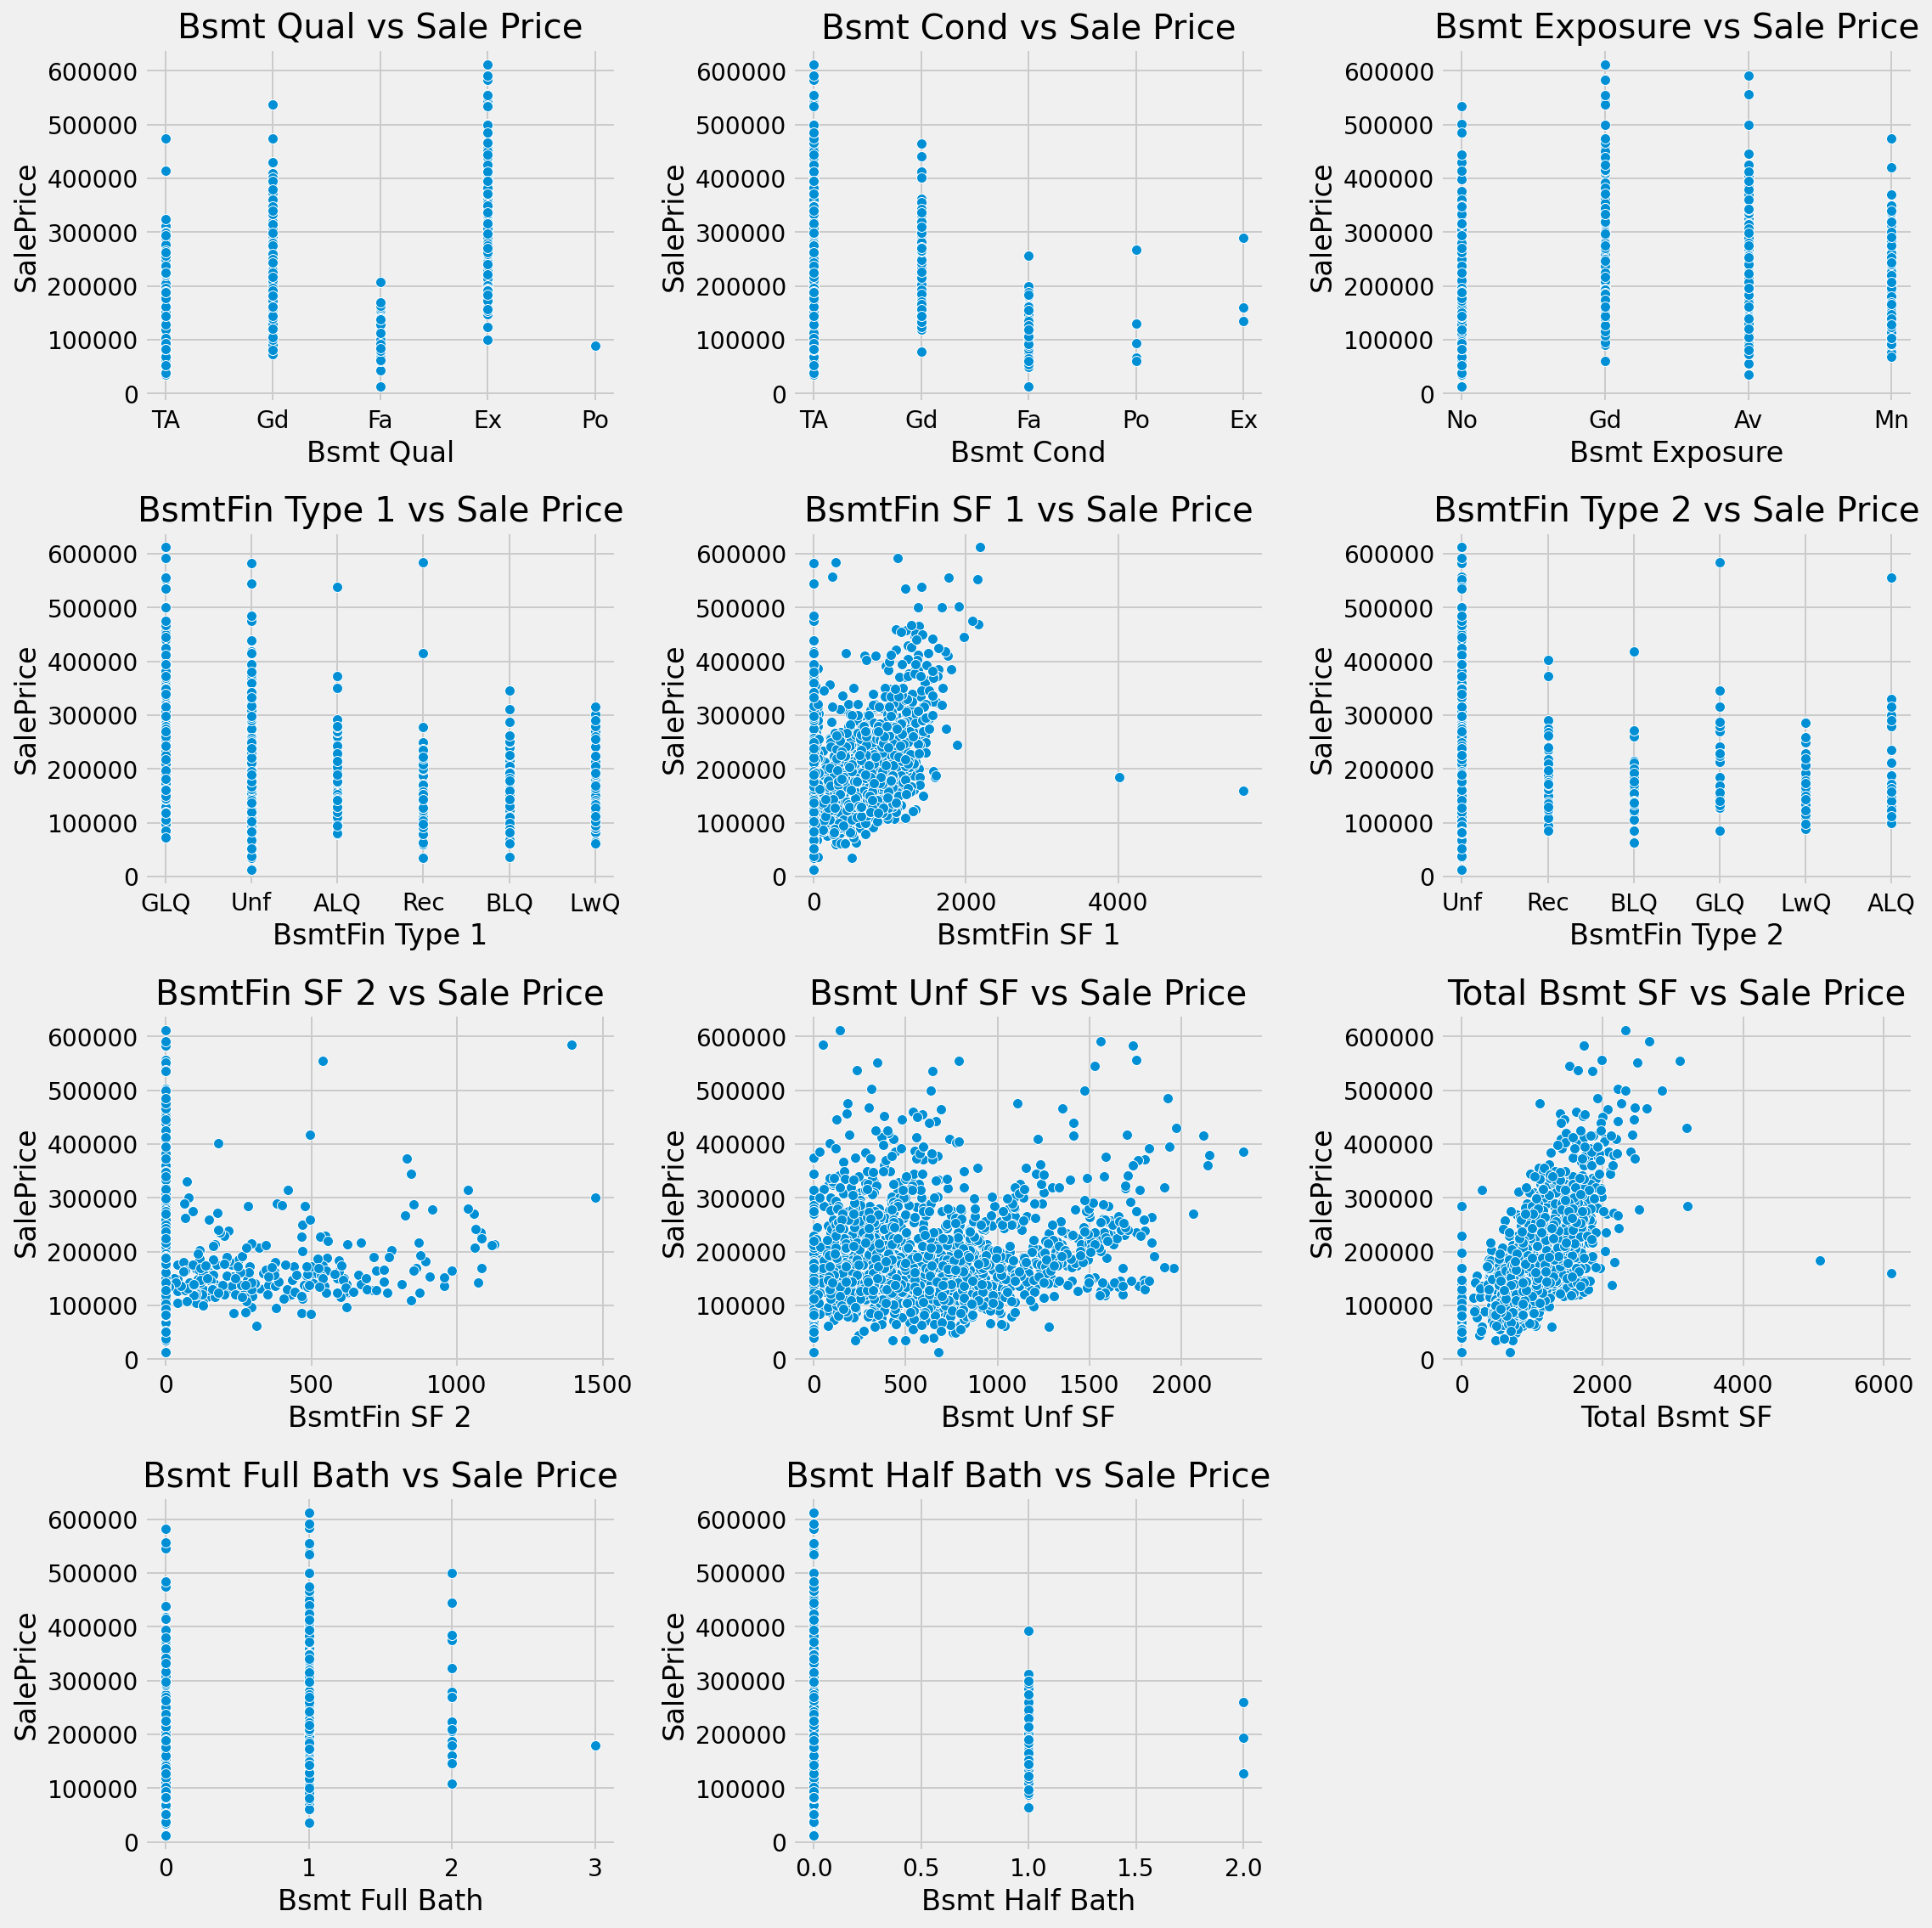

In [80]:
basement_list = [bsmt for bsmt in df_train.columns if 'Bsmt' in bsmt]

plt.figure(figsize = (16,16))

visual_subplot(4 , 3 , basement_list)

### 1.4c General Overview on Garage Features
___

- Total 7 features for Basement : 
    - 4 numeric features : [Garage Yr Built , Garage Cars , Garage Area]
    - 4 non-numeric ordinal features : [Garage Quality , Garage Cond]
    - 2 non-numeric , non-ordinal features : [Garage Type , Garage Finish]
- On a quick observation :
    - Quality and condition of Garage does not highly impact sales price. A typically average Garage can fetch higher then an excellent/good Garage.
    - Garage Area doesn't affect the sales price as much too. An average size Garage has a similiar price range as those of a high agrage area.
- Outlier observed in Garage Year Built. Someone had travalled into the future and build a garage 200 year in advance

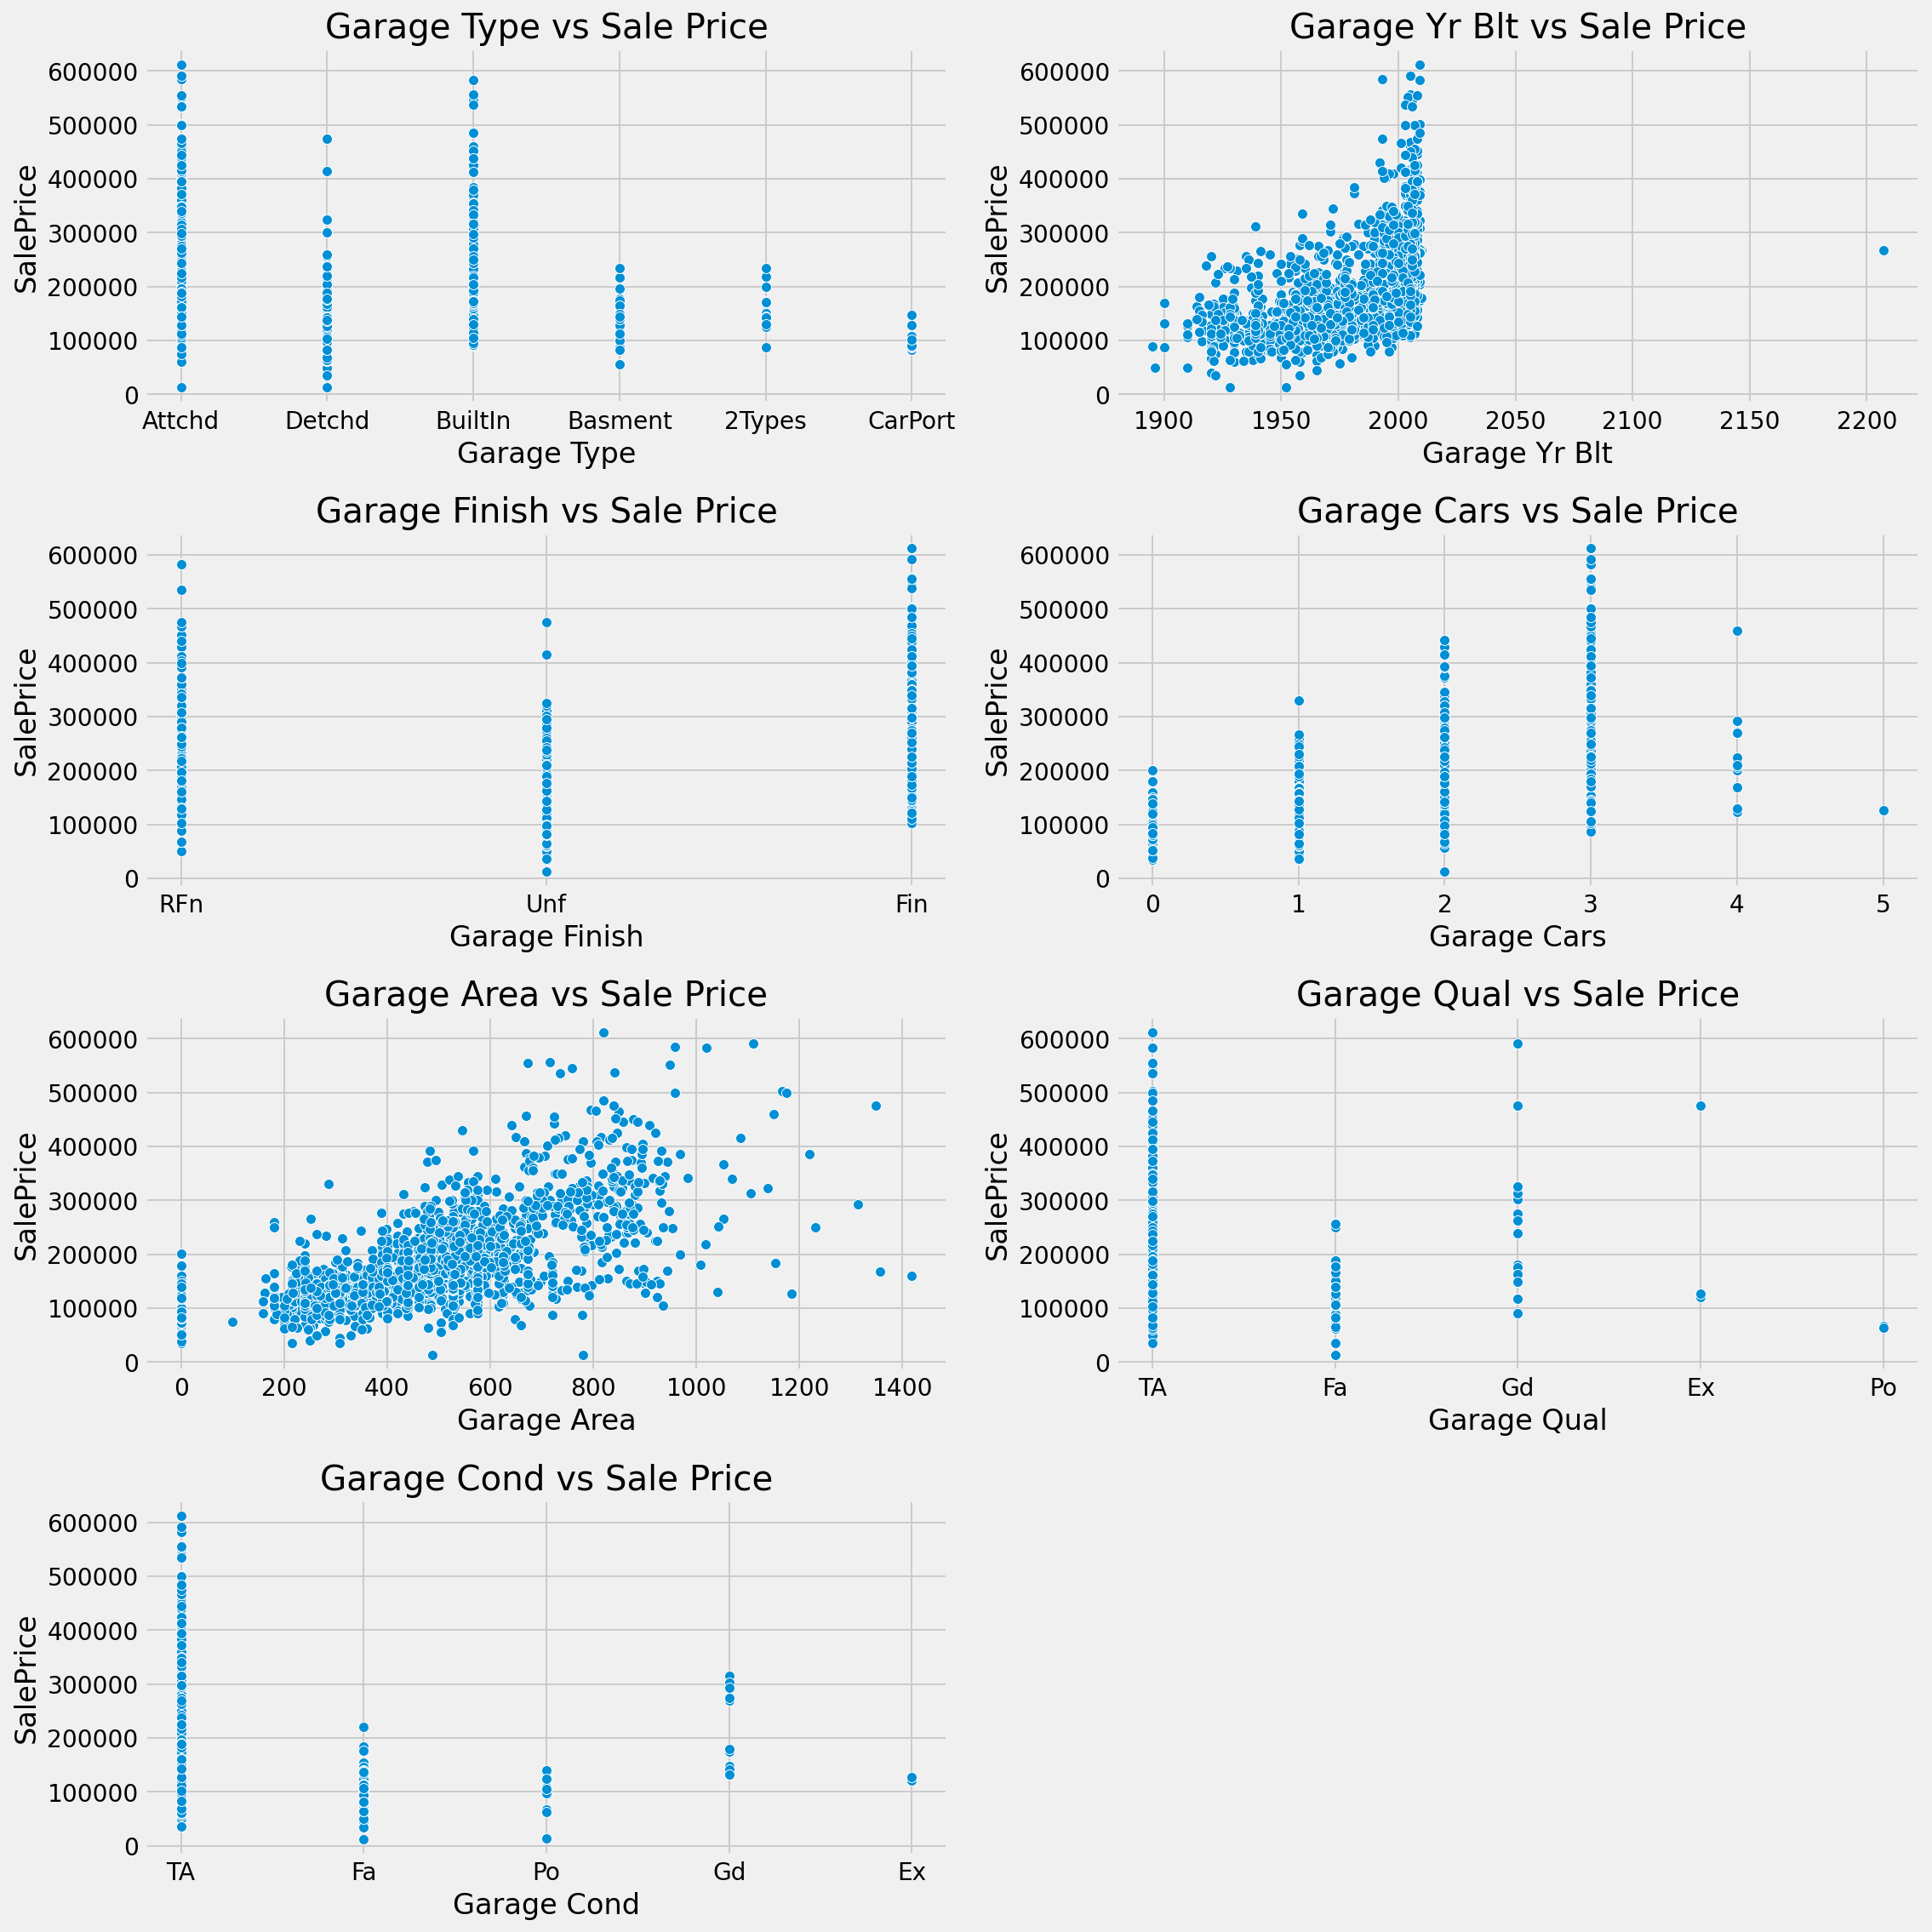

In [79]:
garage_list  = [garage for garage in df_train if 'Garage' in garage]

visual_subplot(4 , 2 , garage_list)

In [53]:
heat_list  = [garage for garage in df_train if 'Heat' in garage]
heat_list

['Heating', 'Heating QC']

<AxesSubplot:>

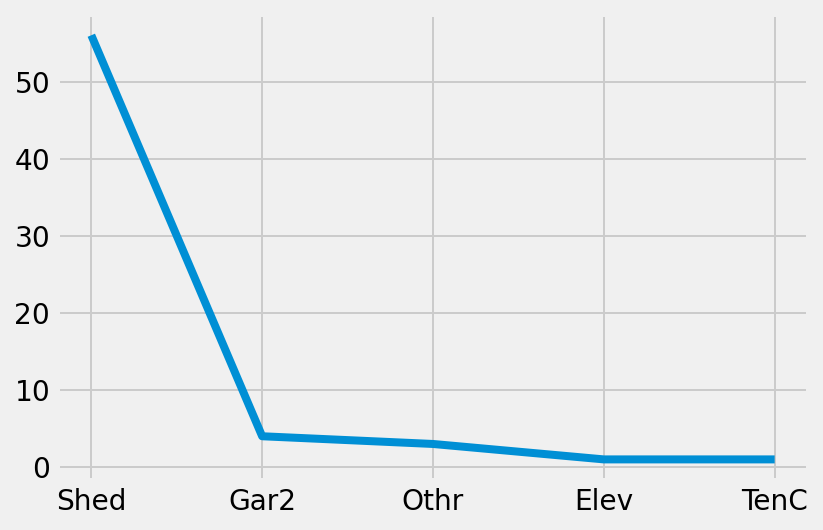

In [67]:
df_train['Misc Feature'].value_counts().plot()